# Basic RNN

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import torch
import torch.nn as nn

# This solves the crashing issue of matplotlib
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

**Creating Data**

In [2]:
# Create a linspace with 800 numbers from 0 to 799
x = torch.linspace(0, 799, 800) # Start, end and how many points.
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [4]:
# Create a sine wave for all this points
y = torch.sin(x * 2 * np.pi/40) # --> x* 2pi/frec
y

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
         7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
        -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
        -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01,
         1.7485e-07,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
         7.0711e-01,  5.8778e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
        -2.3850e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5

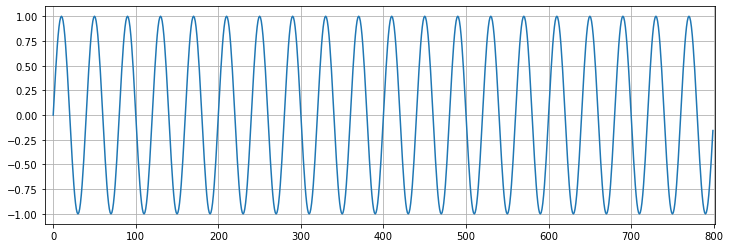

In [5]:
# Let's plot y to see it is a sine wave
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)# from little before to after
plt.grid(True)
plt.plot(y.numpy())

We're going to take some portion of the data and use it to train, the remaining part will be the test!

We wont shuffle data as the sequence is very important!

In [7]:
# Setting the size of test (The portion of data not feeding to the ann)
test_size = 40
train_set = y[:-test_size] # All less test_size
test_set = y[-test_size:]

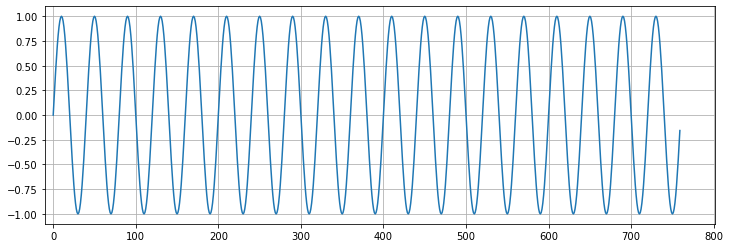

In [8]:
# Let's plot the training set
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)# from little before to after
plt.grid(True)
plt.plot(train_set.numpy())

In [9]:
# Function to create batches from our signal
def input_data(seq, ws):
    # List of tuples indicating sequence and the output
    out = [] # E.g. ([1, 2], [3]), ([3, 4, 5], [6])
    L = len(seq)

    for i in range(L - ws): # ws -> window size
        window = seq[i:i+ws] # First part of tuple [1, 2]
        label =  seq[i+ws:i+ws+1] # The second part of the tuple [3]
        out.append((window, label)) # Saving the tuple

    return out


In [10]:
# For this case, each sin has 40 points
window_size = 40

train_data = input_data(train_set, window_size) # Getting the batches

len(train_data)

720

The maths of this is the following

We have 800 points **[0 - 799]**

We already extract 40 so we keep **760**

For those 740 we have a window_size of 40 so at the end we finish with **720** points.

In [14]:
train_data[2]

(tensor([ 3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,  8.0902e-01,
          8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,  9.8769e-01,
          9.5106e-01,  8.9101e-01,  8.0902e-01,  7.0711e-01,  5.8779e-01,
          4.5399e-01,  3.0902e-01,  1.5643e-01, -8.7423e-08, -1.5643e-01,
         -3.0902e-01, -4.5399e-01, -5.8779e-01, -7.0711e-01, -8.0902e-01,
         -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00, -9.8769e-01,
         -9.5106e-01, -8.9101e-01, -8.0902e-01, -7.0711e-01, -5.8779e-01,
         -4.5399e-01, -3.0902e-01, -1.5643e-01,  1.7485e-07,  1.5643e-01]),
 tensor([0.3090]))

-----------------------

## LSTM definition

In [23]:
class LSTM(nn.Module):
    #    Just have 1 large time series, we can play with
    #    hidden_size and the output is just predicting 1 value
    # Hidden size is the number of neurons in the fcl
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()

        # Layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)

        # Init hidden states which correspond to our input
        # (H, C)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self, seq):
        # the input expect hidden state and current state
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)

        # Prediction. It comes from Linear
        pred = self.linear(lstm_out.view(len(seq), -1))

        # We input [1, 2, 3] and the prediction is [4], the
        # RNN will return [1, 2, 3, 4] but we just care for the last value.
        return pred[-1]

## Instance, criterions and training

In [39]:
# Setting the seed
torch.manual_seed(42)

# Instance
model = LSTM()
# Criterion
criterion = nn.MSELoss()
# This model works better with Stochastic gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Print model
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [40]:
# Printing parameters
total = 0
for p in model.parameters():
    print(p.numel())
    total += p.numel()

print(''.center(30, '='))
print(f'Total param: {total}')

200
10000
200
200
50
1
Total param: 10651


### Training

Epoch: 0		Loss: 0.09209897369146347
Performance on test range: 0.6073052287101746


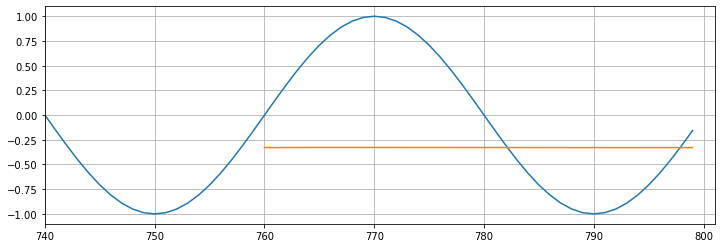

Epoch: 1		Loss: 0.06505247950553894
Performance on test range: 0.5652278661727905


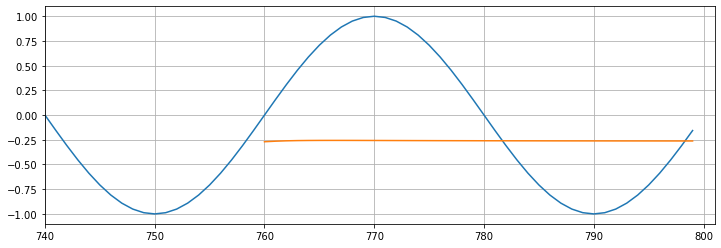

Epoch: 2		Loss: 0.04197341948747635
Performance on test range: 0.5200702548027039


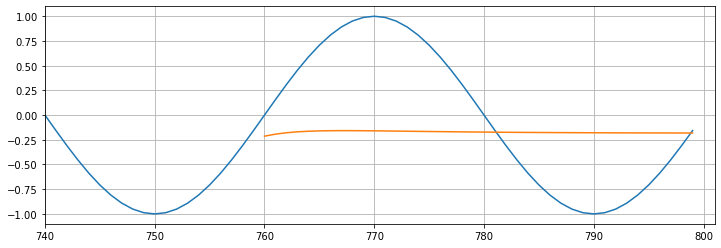

Epoch: 3		Loss: 0.017842357978224754
Performance on test range: 0.4221588671207428


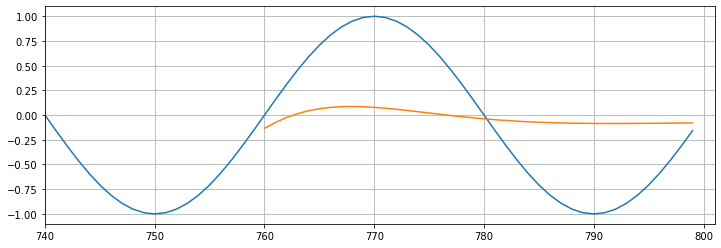

Epoch: 4		Loss: 0.0028890538960695267
Performance on test range: 0.16624271869659424


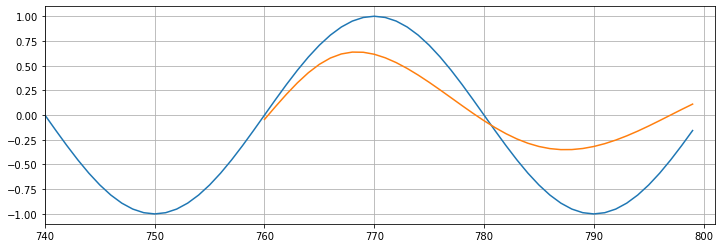

Epoch: 5		Loss: 0.0003210682771168649
Performance on test range: 0.0305510051548481


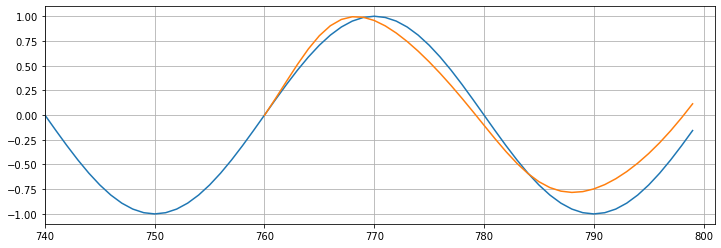

Epoch: 6		Loss: 0.0001303479220950976
Performance on test range: 0.014989708550274372


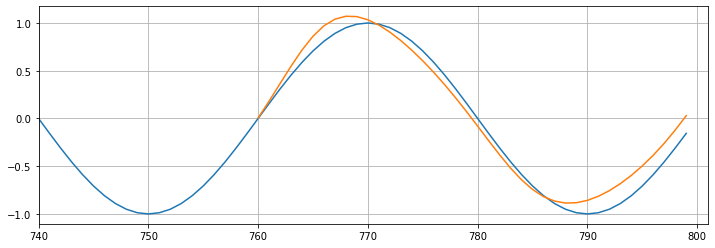

Epoch: 7		Loss: 0.00012068532669218257
Performance on test range: 0.01185627281665802


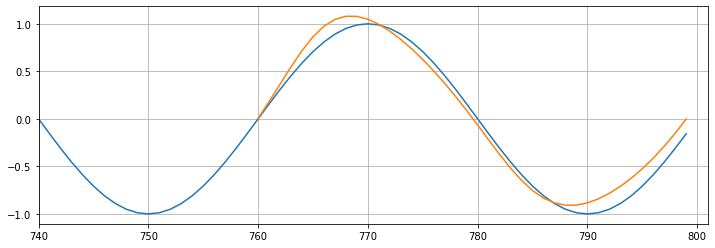

Epoch: 8		Loss: 0.0001271718501811847
Performance on test range: 0.010163594037294388


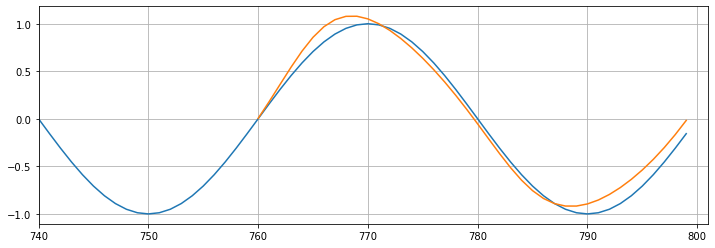

Epoch: 9		Loss: 0.00013256483362056315
Performance on test range: 0.008897281251847744


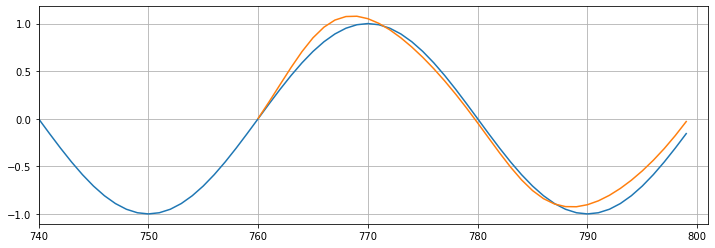

In [41]:
# Setting parameters
epochs = 10
future = 40 # How far in future we will see

# Main loop
for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        # Predicting
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i}\t\tLoss: {loss.item()}')

    # Creating list of preds
    preds = train_set[-window_size:].tolist()

    for f in range(future): # Our testing data
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size),
                            torch.zeros(1, 1, model.hidden_size))

            preds.append(model(seq).item())

    # Calc loss
    # Comparing prediction to the last 40 points (our y_test)
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])

    print(f'Performance on test range: {loss}')

    # Plot the original data vs the predicted one
    plt.figure(figsize=(12, 4))
    plt.xlim(740, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()


---------

### Training with all data

In [42]:
# Training with more data
epochs = 15
window_size = 40
future = 40

# Batching all data
all_data = input_data(y, window_size)
len(all_data)

760

In [43]:
# Checking the required time to train
from time import time
toc = time()

# Main loop
for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        # Predicting
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i}\t\tLoss: {loss.item()}')


total_time = time() - toc
print(''.center(40, '='))
print(f'Required time: {total_time}')

Epoch: 0		Loss: 0.00013519309868570417
Epoch: 1		Loss: 0.00013507808034773916
Epoch: 2		Loss: 0.0001329432416241616
Epoch: 3		Loss: 0.00012939763837493956
Epoch: 4		Loss: 0.00012492107634898275
Epoch: 5		Loss: 0.00011986723984591663
Epoch: 6		Loss: 0.0001145126880146563
Epoch: 7		Loss: 0.0001090491350623779
Epoch: 8		Loss: 0.00010361685417592525
Epoch: 9		Loss: 9.831006900640205e-05
Epoch: 10		Loss: 9.319310629507527e-05
Epoch: 11		Loss: 8.830697333905846e-05
Epoch: 12		Loss: 8.367121336050332e-05
Epoch: 13		Loss: 7.92967839515768e-05
Epoch: 14		Loss: 7.518573693232611e-05
Required time: 96.2633728981018


---------

## Forecasting into unseen data

**I.e. brief look to the future**

In [44]:
# Taking the last 40 data points and predict what's next!

preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        preds.append(model(seq).item())

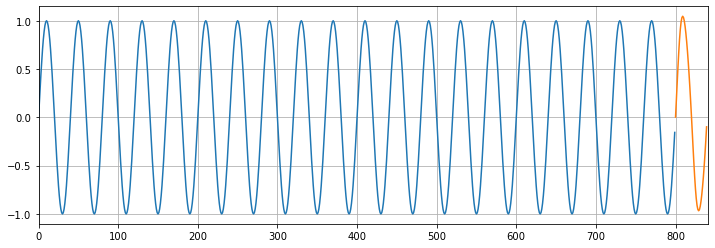

In [45]:
# Checking results
plt.figure(figsize=(12, 4))
plt.xlim(0, 841)
plt.grid(True)
plt.plot(y.numpy())
# Plot future
plt.plot(range(800, 800+future), preds[window_size:])
plt.show()

The prediction is pretty good, but not perfect. The highest peak is higher than 1 and the lowest is not as low as the original.

In [46]:
# Saving model
torch.save(model.state_dict(), '../models/sinewave_rnn.pt')